In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

# Charger le nouveau fichier CSV
new_data = pd.read_csv("./billets_production.csv")

# Vérifier les premières lignes pour s'assurer que le fichier est bien formaté
print(new_data.head())

# Optionnel : Vérifier qu'il n'y a pas de valeurs manquantes
print(new_data.isnull().sum())


   diagonal  height_left  height_right  margin_low  margin_up  length   id
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
id              0
dtype: int64


In [23]:
from sklearn.preprocessing import StandardScaler

# Sélectionner les colonnes géométriques (sans la colonne cible)
X_new = new_data[['length', 'height_left', 'height_right', 'margin_up', 'margin_low', 'diagonal']]

# Appliquer le même scaler utilisé lors de l'entraînement
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)


In [24]:
# Charger le modèle (par exemple un modèle Random Forest)
import joblib

# Charger le modèle et le seuil
model_and_threshold = joblib.load('logreg_model.pkl')
logreg_model = model_and_threshold['model']
optimal_threshold_loaded = model_and_threshold['threshold']

# Appliquer le modèle pour faire des prédictions
y_pred_new = logreg_model.predict(X_new_scaled)

# Ajouter la prédiction au dataframe original pour visualiser
new_data['Prediction_is_genuine'] = y_pred_new

# Afficher les résultats
print(new_data[['length', 'height_left', 'height_right', 'margin_up', 'margin_low', 'diagonal', 'Prediction_is_genuine']].head())


   length  height_left  height_right  margin_up  margin_low  diagonal  \
0  111.42       104.01        103.54       3.30        5.21    171.76   
1  112.09       104.17        104.13       3.31        6.00    171.87   
2  111.57       104.58        104.29       3.39        4.99    172.00   
3  113.20       104.55        104.34       3.03        4.44    172.49   
4  113.33       103.63        103.56       3.16        3.77    171.65   

   Prediction_is_genuine  
0                      0  
1                      0  
2                      0  
3                      1  
4                      1  


In [25]:
# Commençons par changer le bool par du binaire pour la colonne is_genuine
new_data["Prediction_is_genuine"]=new_data["Prediction_is_genuine"].replace([1,0], ["True", "False"])

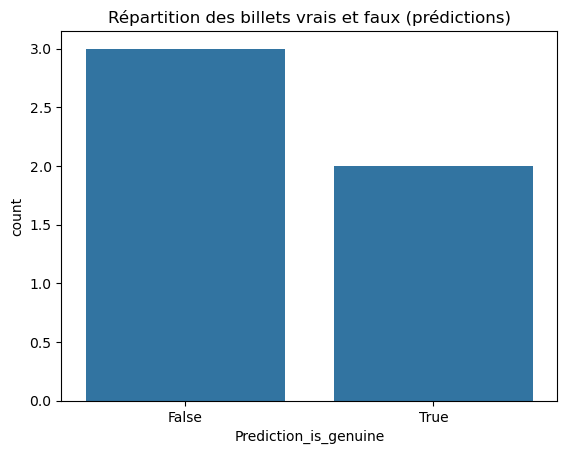

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualiser la répartition des prédictions
sns.countplot(x='Prediction_is_genuine', data=new_data)
plt.title("Répartition des billets vrais et faux (prédictions)")
plt.show()

In [27]:
# Sauvegarder le fichier avec les prédictions
new_data.to_csv('billets_avec_predictions_REGLOG.csv', index=False)

In [28]:
# Charger le nouveau fichier CSV
new_data_prediction = pd.read_csv("./billets_avec_predictions_REGLOG.csv")

# Vérifier les premières lignes pour s'assurer que le fichier est bien formaté
print(new_data_prediction.head())

   diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

   Prediction_is_genuine  
0                  False  
1                  False  
2                  False  
3                   True  
4                   True  
